In [1]:
import os
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt

from os import path, scandir
from shutil import copyfile, rmtree

In [2]:
def show_image(img, size=(40, 6), title=None, vmax=255):
    plt.figure(figsize=size)
    plt.axis('off')
    
    if title is not None:
        plt.title(title)
    
    plt.imshow(img, cmap="gray", vmin=0, vmax=vmax)
    plt.show()

def crop_image(img):
    # argwhere will give you the coordinates of every non-zero point
    true_points = np.argwhere(img)
    # take the smallest points and use them as the top left of your crop
    tl = true_points.min(axis=0)
    # take the largest points and use them as the bottom right of your crop
    br = true_points.max(axis=0)
    # plus 1 because slice isn't inclusive
    out = img[tl[0]:br[0]+1, tl[1]:br[1]+1]
    return out

def pad_image(img, new_size):
    height, width = img.shape
    delta_h = new_size - height
    delta_w = new_size - width
    bottom = delta_h // 2
    left = delta_w // 2
    top = delta_h - bottom
    right = delta_w - left
    black = [0,0,0]
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=black)
    
    return img

def read_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def process_image(img, size):
    # to binary image.
    img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    # fit to bounding box & resize
    if (size != img.shape):
        img = cv2.bitwise_not(img)
        img = crop_image(img)
        img = pad_image(img, max(img.shape) + 5)
        img = cv2.resize(img, size, interpolation=cv2.INTER_NEAREST)
        img = cv2.bitwise_not(img)
    
    return img

def split_into_blocks(arr, rsize, csize):
    r, h = arr.shape
    return (arr.reshape(h//rsize, rsize, -1, csize)
               .swapaxes(1, 2)
               .reshape(-1, rsize, csize))

def pixelate_image(img, map_size):
    img_shape = img.shape
    img_size = img_shape[0]
    block_size = img_size // map_size
    
    inverted = cv2.bitwise_not(img)
    blocks = split_into_blocks(inverted, block_size, block_size)

    resized = np.full((map_size, map_size), 255)
    for i, block in enumerate(blocks):
        if block.sum() > 0:
            resized[i // map_size][i % map_size] = 0
            
    return resized

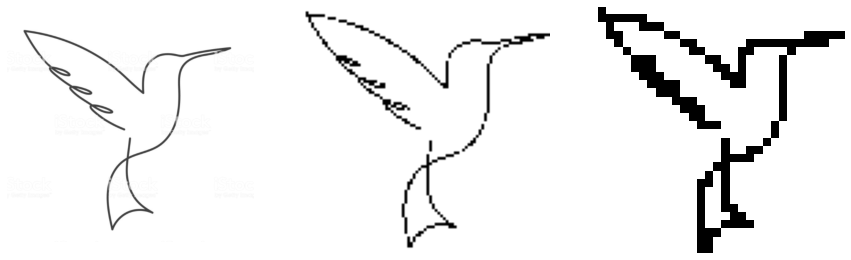

In [3]:
size = 90
out_size = (size,size)

img0 = read_image('raw_images/bird.png')
img1 = process_image(img0, out_size)
img2 = pixelate_image(img1, 30)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,10))
ax0.axis('off')
ax1.axis('off')
ax2.axis('off')
ax0.imshow(img0, cmap="gray", vmin=0, vmax=255)
ax1.imshow(img1, cmap="gray", vmin=0, vmax=255);
ax2.imshow(img2, cmap="gray", vmin=0, vmax=255);

In [4]:
root = path.join("raw_images")
target = path.join("images")

try:
    rmtree(target)
except: 
    pass
os.mkdir(target)

sizes = [(20,20), (30,30), (40,40), (90,90), (100,100), (300, 300), (600, 600)]

# Make folder for sizes.
pixelated = path.join(target, 'pix')
orig = path.join(target, 'orig')
orig_square = path.join(target, 'orig_square')
os.mkdir(pixelated)
os.mkdir(orig)
os.mkdir(orig_square)
for size in sizes:
    dim = size[0]
    os.mkdir(path.join(pixelated, f'{dim}'))
    os.mkdir(path.join(target, f'{dim}'))

# Generate images by sizes.
for entry in os.scandir(root):
    if entry.name.endswith("png"):
        name = entry.name.split('.png')[0]
        orig = read_image(entry.path)
        print(name)
            
        img = process_image(orig, orig.shape)
        cv2.imwrite(path.join(target, 'orig' , f'{name}.png'), img)
        
        max_side = max(orig.shape)
        img = process_image(orig, (max_side, max_side))
        cv2.imwrite(path.join(target, 'orig_square' , f'{name}.png'), img)
            
        # resize
        for size in sizes:
            dim = size[0]
            
            img = process_image(orig, tuple(3*x for x in size))
            pix = pixelate_image(img, dim)
            cv2.imwrite(path.join(pixelated, str(dim), f'{name}.png'), pix)
            
            img = process_image(orig, size)
            cv2.imwrite(path.join(target, str(dim), f'{name}.png'), img)
            
print('\n Preprocessing done.')

ball
peugeot
three
group
flowers
lion
nike
kangaroo
cactus
bird
cerscent
pointer
hourglass
owl
house
dinosaur
heart
face1
sword
face2
face3
face6
face4
flower
face5
woman
leaf
ballerina
